## Implied Surface Plot

In [11]:
import numpy as np
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [12]:
# generate strike prices between 100 and 200

In [13]:
strike_price = np.linspace(100,200,50)
time_to_maturity = np.linspace(0.25,3,50)

In [14]:
# build a coordinate system with 'x' and 'y' variables
strike_price, time_to_maturity = np.meshgrid(strike_price, time_to_maturity)

In [19]:
# generate pseudo-implied volatility by using strike price and time-to-maturity as parameters
implied_vol = ((strike_price - 150)**2)/(150 * strike_price)/(np.power(time_to_maturity, 0.95))

In [22]:
len(implied_vol[0])

50

In [7]:
fig = plot.figure(figsize = (10,5)) ## a plot object
ax = Axes3D(fig) # create a 3D object/handle

In [8]:
##plot surface: array row/column stride(step size:2)
surf = ax.plot_surface(strike_price, time_to_maturity, implied_vol, rstride = 2, cstride = 2, cmap = cm.coolwarm, linewidth = 0.5, antialiased = False)

In [9]:
#set x,y,a labels
ax.set_xlabel('Strike Price')
ax.set_ylabel('time to maturity')
ax.set_zlabel('implied volatility')
plot.show()

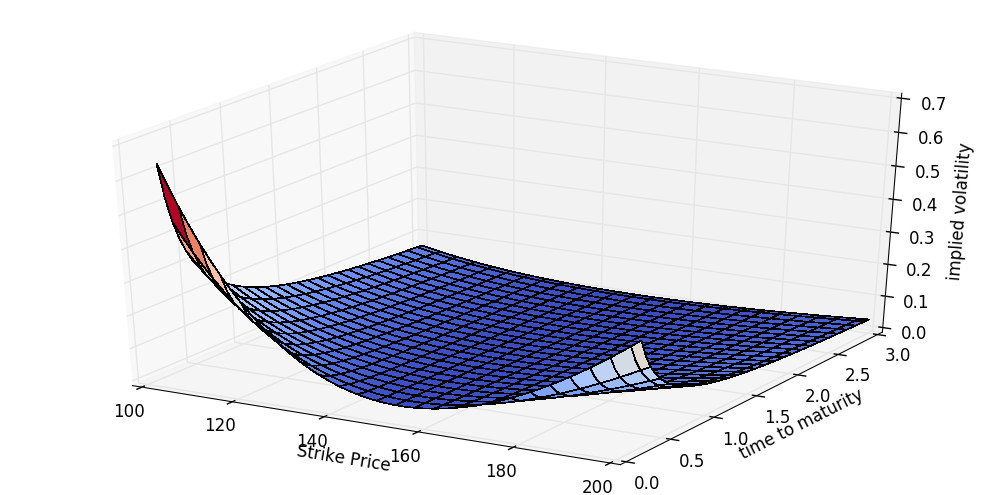

In [11]:
from IPython.display import Image
Image('figure_1.png')

**There are at least three methods to solve the nonlinear equation**

* bisection method (linear convergence)

* newtown method (quadratic convergence)

* muller-bisection (superlinear between linear and quadratic convergence

get the f'(x) from the BSM model

the partical derivative of the option pricing formula with respect to 

Given an option with stock price: $80 and its strike price
$100 and time to maturity is ¾ years. Suppose the
interest rate is 10.5%. Write a program to compute its
Vega
Note: Vega is independent of option put/call type

In [28]:
from scipy import stats

In [25]:
def BSM_vega(S,K,T,r,sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T)/ (sigma * np.sqrt(T))
    N_d1 = stats.norm.cdf(d1, 0.0, 1.0)
    
    N_d1_derivative = stats.norm.pdf(d1, 0.0, 1.0)*np.sqrt(T)
    vega = S * N_d1_derivative * np.sqrt(T)
    return vega

In [26]:
S = 80
K = 100
T = 0.75
r = 0.105
sigma = 0.1

In [29]:
BSM_vega(S,K,T,r,sigma)

6.4025656569563809